In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
card_values=np.append(np.arange(1,11),[10,10,10])
card_probs=(4.0/52.0)*np.ones(np.size(card_values))

dealer_threshold = 16

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65
Run 66
Run 67
Run 68
Run 69
Run 70
Run 71
Run 72
Run 73
Run 74
Run 75
Run 76
Run 77
Run 78
Run 79
Run 80
Run 81
Run 82
Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99


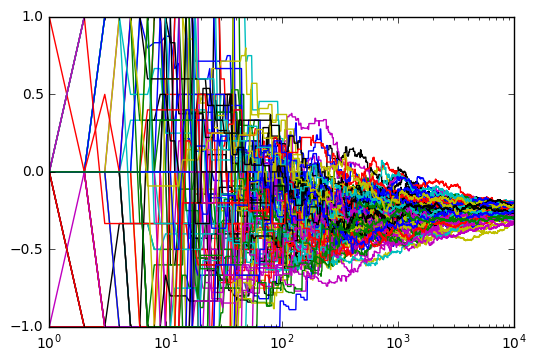

In [70]:
nbEpisodes = 10000
nbRuns = 100

#MC approximation of the value function, after each episode
V_ordinary=np.zeros((nbEpisodes,nbRuns))
V_weighted=np.zeros((nbEpisodes,nbRuns))

for run in range(nbRuns):
    print 'Run', run
    rho_sum=0
    weighted_return=0
    
    for ep in range(1,nbEpisodes):
        
        #Player's initial state is s=13, with a usable ace
        usable_ace_player=True
        s=13
        #dealer's initial state is 2, and has no usable ace
        #(since deck is infinite, it makes no difference to consider that Dealer 
        #   draws first card before or after player)
        d=2
        usable_ace_dealer=False
        
        R=0
        rho=1
        
        #first, player keeps hitting until sticks or busts
        #according to mu, players hits or stick with probability 0.5
        hit=True
        while(hit):
            hit=False
            if(np.random.rand()<0.5):
                #player sticks
                if(s<20):
                    rho=0.0
                else:
                    rho=rho*2
                    
                break
            else:
                #player hits
                hit=True
                if(s>=20):
                    rho=0.0
                    break
                else:
                    rho=rho*2
                    
                #draw card
                card=np.random.choice(card_values,1,p=card_probs)
                
                
                if (s+card<22):
                    s=s+card
                else:
                    #if usable ace, use it, other wise go bust
                    if (usable_ace_player):
                        s=s+card-10
                        usable_ace_player=False 
                    else:
                        R=-1
                        break
                   
        if (rho==0.0 or R==-1):
            #if rho==0 there is no need to continue
            #indeed, the return won't affect the estimation
            #if player goes bust (R==-1), then the episode is terminated
            #update values and go to next episode
            
            rho_sum += rho
            weighted_return+=rho*R
            
            
            #update estimates
            V_ordinary[ep,run]=V_ordinary[ep-1,run]+(1.0/ep)*(rho*R-V_ordinary[ep-1,run])
            
            if(rho_sum >0):
                V_weighted[ep,run] = weighted_return / rho_sum
            
            continue
        
        #Now, dealer hits until goes bust or passes threshold
        while(d<dealer_threshold or usable_ace_dealer):
                
            #dealer draws card
            card=np.random.choice(card_values,1,p=card_probs)

            if (d+card<22):
                d=d+card
            else:
                #if usable ace, use it, other wise go bust
                if (usable_ace_dealer):
                    s=s+card-10
                    usable_ace_dealer=False 
                else:
                    R=1
                    break
        
        
        if(s>d):
            R=1
        elif(s==d):
            R=0
        else:
            R=-1
        
        #keep track of ratio and approximated value
        rho_sum += rho
        weighted_return+=rho*R
        #print ep, rho_sum, rho*R, weighted_return
        

        #update estimates
        V_ordinary[ep,run]=V_ordinary[ep-1,run]+(1.0/ep)*(rho*R-V_ordinary[ep-1,run])

        if(rho_sum >0):
            V_weighted[ep,run] = weighted_return / rho_sum
            
        
    #MC run finished
    #plt.semilogx(range(nbEpisodes),V_weighted[:,run])

#plot evolution of MC approximation
#plt.axis([0,nbEpisodes,-1,1])
#plt.show()


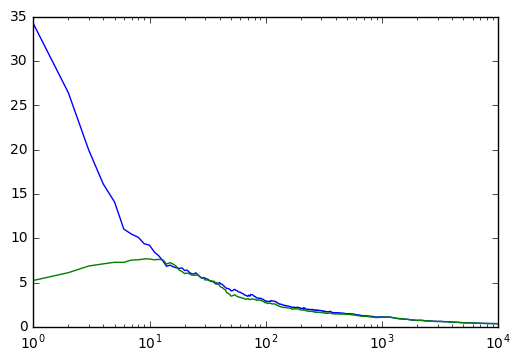

In [80]:
RMS_ordinary=np.sqrt(np.sum((V_ordinary+0.27726)**2,1))
RMS_weighted=np.sqrt(np.sum((V_weighted+0.27726)**2,1))

plt.semilogx(range(nbEpisodes),RMS_ordinary)
plt.semilogx(range(nbEpisodes),RMS_weighted)
plt.show()